In [1]:

# Phase 1: Project Setup & Data Understanding
# Step 1: Environment Setup & Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta # timedelta is useful for RFM
import scipy.stats as stats

In [5]:
# Loading the data
df = pd.read_csv(r"C:\Users\chroh\Downloads\cleaned_sales_customer_behavior_data.csv")
# Initial Data Inspection & Understanding
df.head()

,Customer_ID,Customer_Name,Gender,Age,Customer_Segment,Purchase_Date,Product_Category,Quantity,Unit_Price,Total_Amount,...,Sales_Channel,Region,Weekday,Month,Quarter,Year,Cost_Price,Revenue,Profit,Margin
0,355c5806,Hannah Garcia,Other,28,New,04-06-2023,Sports,7,1770,12390,...,App,South,Sunday,6,2,2023,1131,12389,4469,0.36
1,31c4c728,Brittany Davila,Female,40,Regular,10-07-2023,Home Appliances,7,789,5523,...,App,East,Monday,7,3,2023,578,5520,1477,0.27
2,116363b4,Emily Martinez,Other,38,New,02-08-2024,Beauty,10,106,1060,...,App,North,Friday,8,3,2024,68,1060,379,0.36
3,4de12745,Nicole Martin,Male,39,Regular,15-03-2025,Home Appliances,4,685,2740,...,Online,North,Saturday,3,1,2025,442,2741,971,0.35
4,1de1d2ef,Melissa Ruiz,Female,41,New,22-10-2024,Home Appliances,10,327,3270,...,In-Store,East,Tuesday,10,4,2024,292,3269,351,0.11


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       30000 non-null  object 
 1   Customer_Name     30000 non-null  object 
 2   Gender            30000 non-null  object 
 3   Age               30000 non-null  int64  
 4   Customer_Segment  30000 non-null  object 
 5   Purchase_Date     30000 non-null  object 
 6   Product_Category  30000 non-null  object 
 7   Quantity          30000 non-null  int64  
 8   Unit_Price        30000 non-null  int64  
 9   Total_Amount      30000 non-null  int64  
 10  Payment_Method    30000 non-null  object 
 11  Sales_Channel     30000 non-null  object 
 12  Region            30000 non-null  object 
 13  Weekday           30000 non-null  object 
 14  Month             30000 non-null  int64  
 15  Quarter           30000 non-null  int64  
 16  Year              30000 non-null  int64 

In [9]:
print(df.shape)

(30000, 21)


In [11]:
print(df.describe(include='all').T)

                    count unique              top   freq          mean  \
Customer_ID         30000  29999         1fa72a47      2           NaN   
Customer_Name       30000  25747  Michael Johnson     17           NaN   
Gender              30000      3           Female  10067           NaN   
Age               30000.0    NaN              NaN    NaN       41.4039   
Customer_Segment    30000      3          Premium  10013           NaN   
Purchase_Date       30000    731       12-09-2023     60           NaN   
Product_Category    30000      7           Sports   4374           NaN   
Quantity          30000.0    NaN              NaN    NaN      5.488867   
Unit_Price        30000.0    NaN              NaN    NaN   2562.678867   
Total_Amount      30000.0    NaN              NaN    NaN  14072.341933   
Payment_Method      30000      5      Credit Card   6071           NaN   
Sales_Channel       30000      3           Online  10063           NaN   
Region              30000      4      

In [13]:
# checking for Missing Values
print(df.isnull().sum())

Customer_ID         0
Customer_Name       0
Gender              0
Age                 0
Customer_Segment    0
Purchase_Date       0
Product_Category    0
Quantity            0
Unit_Price          0
Total_Amount        0
Payment_Method      0
Sales_Channel       0
Region              0
Weekday             0
Month               0
Quarter             0
Year                0
Cost_Price          0
Revenue             0
Profit              0
Margin              0
dtype: int64


In [23]:
# Handling Duplicates
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
final_rows = df.shape[0]
print(f"\nRemoved {initial_rows - final_rows} duplicate rows.")
print(f"Current shape: {df.shape}")



Removed 0 duplicate rows.
Current shape: (30000, 21)


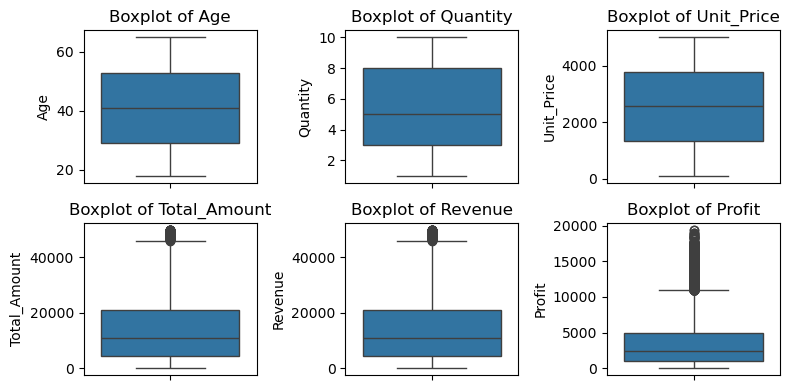

In [31]:
# Outlier Detection (Visual Inspection)
numerical_cols_for_outliers = ['Age', 'Quantity', 'Unit_Price', 'Total_Amount', 'Revenue', 'Profit']
plt.figure(figsize=(8, 4))
for i, col in enumerate(numerical_cols_for_outliers):
    if col in df.columns:
        plt.subplot(2, 3, i + 1) # Adjust grid size as needed
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

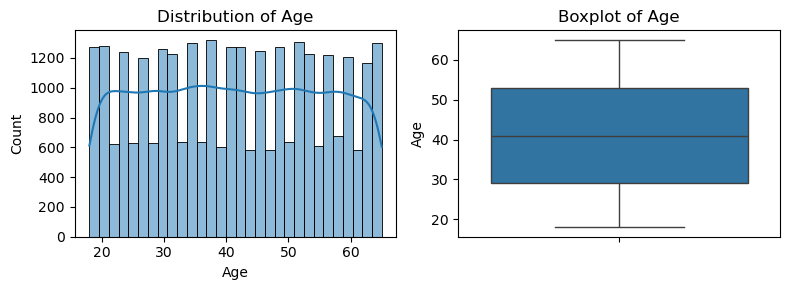

--- Descriptive Stats for Age ---
count    30000.00000
mean        41.40390
std         13.83191
min         18.00000
25%         29.00000
50%         41.00000
75%         53.00000
max         65.00000
Name: Age, dtype: float64
----------------------------------------


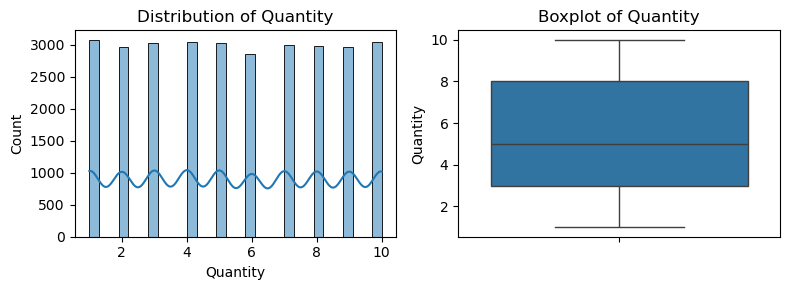

--- Descriptive Stats for Quantity ---
count    30000.000000
mean         5.488867
std          2.882583
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: Quantity, dtype: float64
----------------------------------------


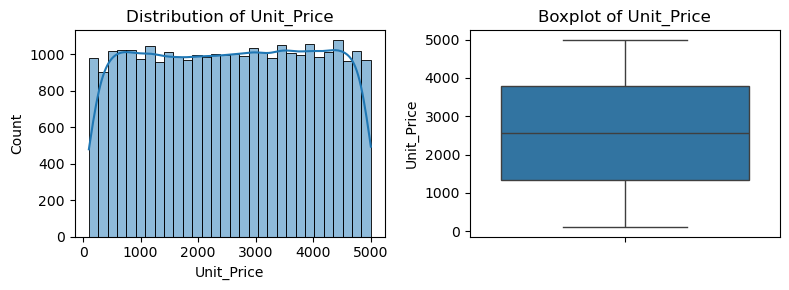

--- Descriptive Stats for Unit_Price ---
count    30000.000000
mean      2562.678867
std       1411.658932
min        100.000000
25%       1332.000000
50%       2574.000000
75%       3786.250000
max       5000.000000
Name: Unit_Price, dtype: float64
----------------------------------------


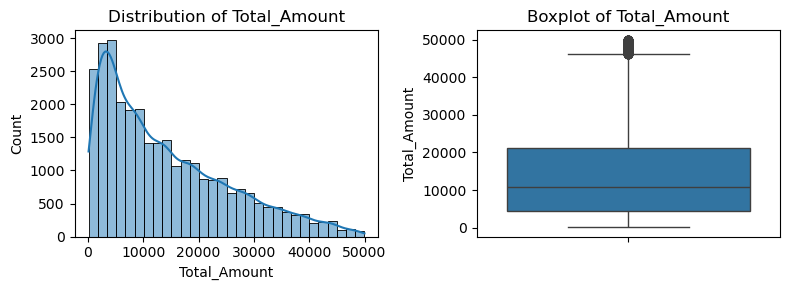

--- Descriptive Stats for Total_Amount ---
count    30000.000000
mean     14072.341933
std      11454.237091
min        102.000000
25%       4518.000000
50%      10900.000000
75%      21140.000000
max      49990.000000
Name: Total_Amount, dtype: float64
----------------------------------------


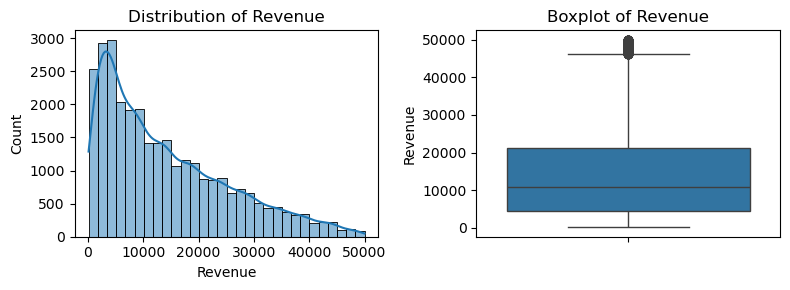

--- Descriptive Stats for Revenue ---
count    30000.000000
mean     14072.314767
std      11454.217367
min        102.000000
25%       4518.000000
50%      10900.500000
75%      21138.250000
max      49987.000000
Name: Revenue, dtype: float64
----------------------------------------


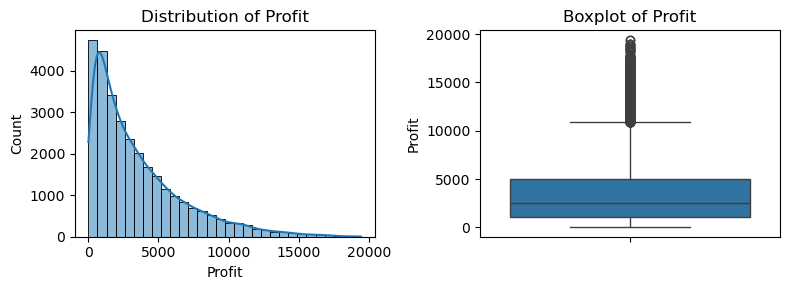

--- Descriptive Stats for Profit ---
count    30000.00000
mean      3504.82610
std       3246.55112
min         11.00000
25%       1044.75000
50%       2488.00000
75%       4991.00000
max      19426.00000
Name: Profit, dtype: float64
----------------------------------------


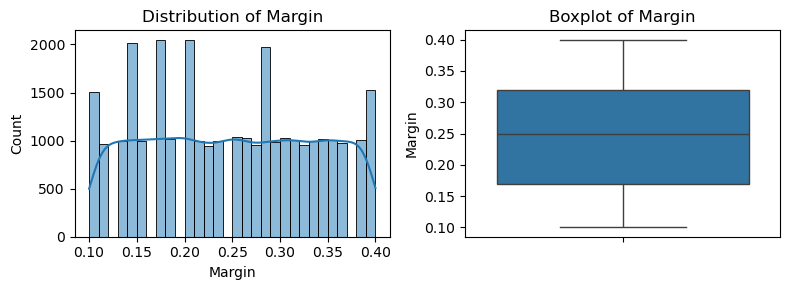

--- Descriptive Stats for Margin ---
count    30000.000000
mean         0.249914
std          0.086759
min          0.100000
25%          0.170000
50%          0.250000
75%          0.320000
max          0.400000
Name: Margin, dtype: float64
----------------------------------------


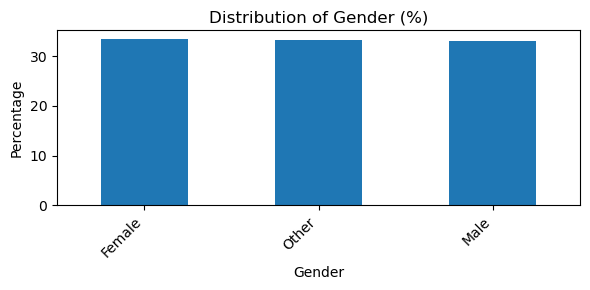

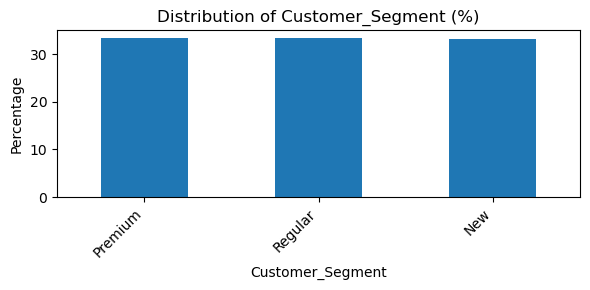

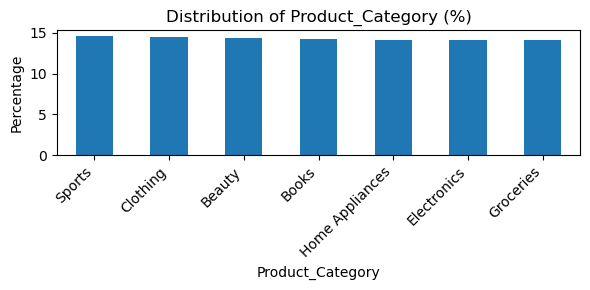

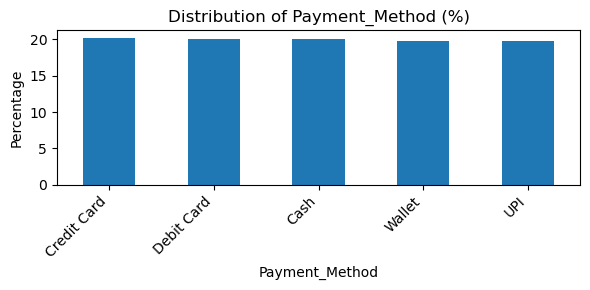

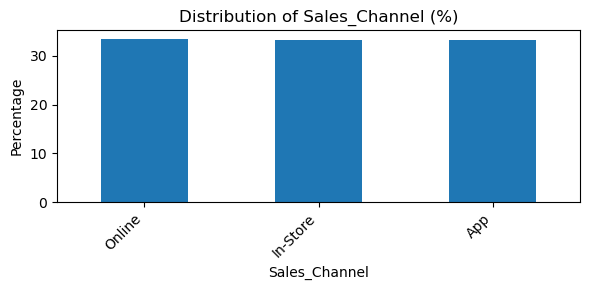

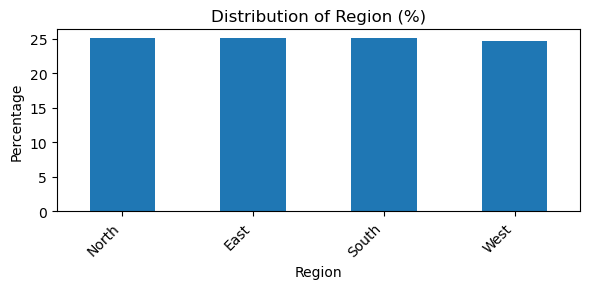

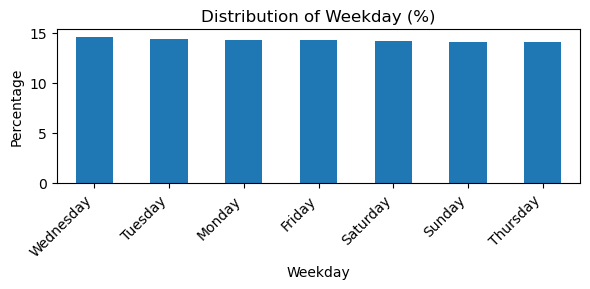

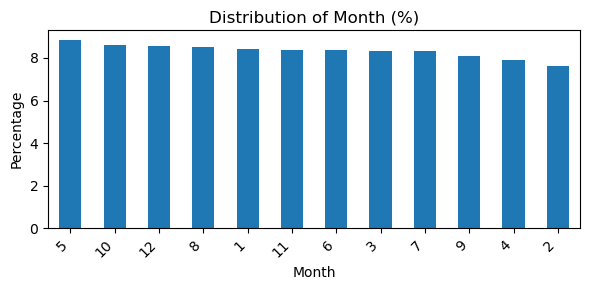

In [87]:
# Univariate Analysis
# In [] Code Cell
# Step 8: Univariate Analysis

# --- Numerical Variables: Histograms and Box Plots ---
numerical_cols_eda = ['Age', 'Quantity', 'Unit_Price', 'Total_Amount', 'Revenue', 'Profit', 'Margin']
for col in numerical_cols_eda:
    if col in df.columns:
        plt.figure(figsize=(8, 3))
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()
        print(f"--- Descriptive Stats for {col} ---")
        print(df[col].describe())
        print("-" * 40)
    else:
        print(f"Column {col} not found for univariate numerical EDA.")

# --- Categorical Variables: Bar Plots ---
categorical_cols_eda = ['Gender', 'Customer_Segment', 'Product_Category', 'Payment_Method', 'Sales_Channel', 'Region', 'Weekday', 'Month']
for col in categorical_cols_eda:
    if col in df.columns:
        plt.figure(figsize=(6, 3))
        df[col].value_counts(normalize=True).mul(100).plot(kind='bar') # Show as percentage
        plt.title(f'Distribution of {col} (%)')
        plt.ylabel('Percentage')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column {col} not found for univariate categorical EDA.")

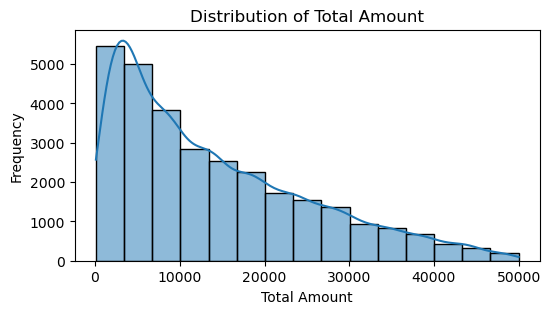

In [39]:
# EDA - Distribution of Transaction Amount (Histogram)
plt.figure(figsize=(6, 3))
sns.histplot(df['Total_Amount'], kde=True, bins=15)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

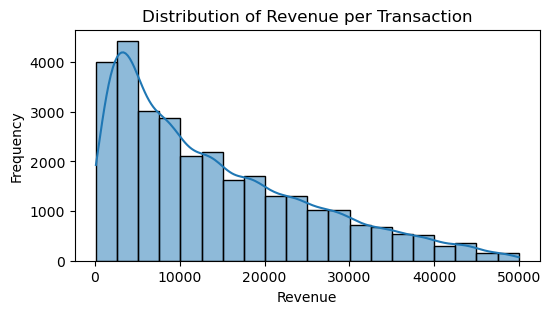

In [57]:
# In [9]: Code Cell
# Step 9: EDA - Distribution of 'Revenue' (Histogram)
plt.figure(figsize=(6, 3))
sns.histplot(df['Revenue'], kde=True, bins=20) # Using 'Revenue' as the monetary value for RFM
plt.title('Distribution of Revenue per Transaction')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

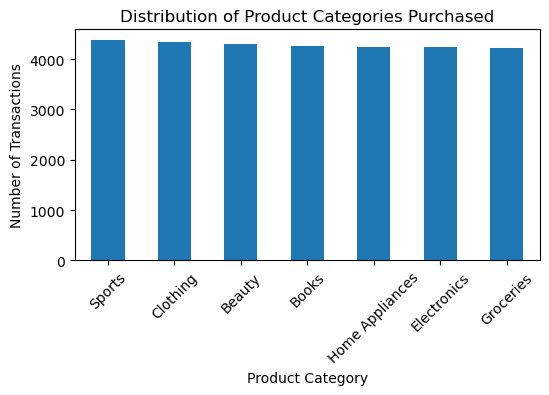

In [43]:
# Distribution of Product Category (Bar Plot)
plt.figure(figsize=(6, 3))
df['Product_Category'].value_counts().plot(kind='bar')
plt.title('Distribution of Product Categories Purchased')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

C:\Users\chroh\AppData\Local\Temp\ipykernel_35812\3324951575.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.set_index('Purchase_Date').resample('M')['Revenue'].sum()


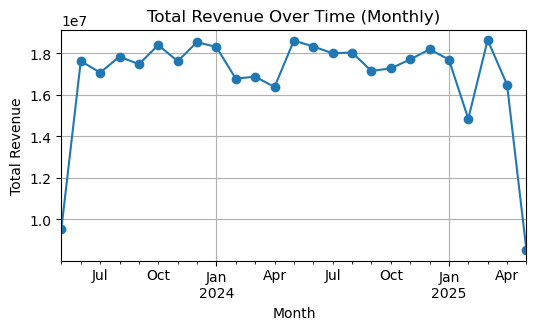

In [97]:
# Sales (Revenue) Over Time (Monthly)
# Resample data by month and sum 'Revenue'
monthly_revenue = df.set_index('Purchase_Date').resample('M')['Revenue'].sum()

plt.figure(figsize=(6, 3))
monthly_revenue.plot(kind='line', marker='o')
plt.title('Total Revenue Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

In [63]:
# Calculate RFM Metrics
# Define a 'current_date' for Recency calculation.
# This is usually the day after the last transaction in the dataset.
current_date = df['Purchase_Date'].max() + timedelta(days=1)
print(f"Current date for RFM calculation: {current_date.strftime('%Y-%m-%d')}")

# Aggregate data per customer for RFM
rfm_df = df.groupby('Customer_ID').agg(
    Recency=('Purchase_Date', lambda x: (current_date - x.max()).days),  # Days since last purchase
    Frequency=('Customer_ID', 'count'),    # Total number of transactions (using Customer_ID count)
    Monetary=('Revenue', 'sum')                                         # Total 'Revenue' spent
).reset_index()

Current date for RFM calculation: 2025-05-15


In [65]:
# Display the First Few Rows of the RFM DataFrame
print("--- RFM DataFrame (First 5 Rows) ---")
rfm_df.head()

--- RFM DataFrame (First 5 Rows) ---


,Customer_ID,Recency,Frequency,Monetary
0,000004d6,713,1,13180
1,0000c611,101,1,7033
2,00023bcb,573,1,3983
3,0005b1a9,46,1,11534
4,000d121c,703,1,16442


In [67]:
# In [14]: Code Cell
# Step 14: Display Descriptive Statistics for RFM Metrics
print("--- RFM DataFrame Description ---")
rfm_df.describe()

--- RFM DataFrame Description ---


,Recency,Frequency,Monetary
count,29999.000000,29999.000000,29999.000000
mean,364.975533,1.000033,14072.783859
std,210.908879,0.005774,11454.185359
min,1.000000,1.000000,102.000000
25%,182.000000,1.000000,4518.500000
50%,363.000000,1.000000,10901.000000
75%,548.000000,1.000000,21138.500000
max,731.000000,2.000000,49987.000000


In [69]:
#  Create RFM Scores
# We'll divide customers into 3 tiers for each RFM metric (e.g., Low, Medium, High -> 1, 2, 3)

# Recency Score: Lower recency (more recent) is better (higher score)
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=3, labels=[3, 2, 1], duplicates='drop') 
# 3=Most Recent, 1=Least Recent

# Frequency Score: Higher frequency is better (higher score)
# Using rank(method='first') helps create unique values for qcut if there are many ties 
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), q=3, labels=[1, 2, 3], duplicates='drop') 
# 1=Least Frequent, 3=Most Frequent

# Monetary Score: Higher monetary value is better (higher score)
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'].rank(method='first'), q=3, labels=[1, 2, 3], duplicates='drop') 
# 1=Lowest Spend, 3=Highest Spend

# Convert scores to integer type
rfm_df['R_Score'] = rfm_df['R_Score'].astype(int)
rfm_df['F_Score'] = rfm_df['F_Score'].astype(int)
rfm_df['M_Score'] = rfm_df['M_Score'].astype(int)

print("--- RFM Scores (First 5 Rows) ---")
rfm_df[['Customer_ID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score']].head()

--- RFM Scores (First 5 Rows) ---


,Customer_ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,000004d6,713,1,13180,1,1,2
1,0000c611,101,1,7033,3,1,2
2,00023bcb,573,1,3983,1,1,1
3,0005b1a9,46,1,11534,3,1,2
4,000d121c,703,1,16442,1,1,2


In [71]:
# Combine RFM Scores into a Single RFM Score (Optional but useful)
rfm_df['RFM_Score_Combined'] = rfm_df['R_Score'].astype(str) + \
                               rfm_df['F_Score'].astype(str) + \
                               rfm_df['M_Score'].astype(str)

print("--- RFM Scores with Combined Score (First 5 Rows) ---")
rfm_df[['Customer_ID', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score_Combined']].head()

--- RFM Scores with Combined Score (First 5 Rows) ---


,Customer_ID,R_Score,F_Score,M_Score,RFM_Score_Combined
0,000004d6,1,1,2,112
1,0000c611,3,1,2,312
2,00023bcb,1,1,1,111
3,0005b1a9,3,1,2,312
4,000d121c,1,1,2,112


In [73]:
# In [17]: Code Cell
# Step 17: Define Customer Segments Based on RFM Scores
# This is a simplified segmentation logic. You can make it more granular.

def assign_segment(row):
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']

    if r == 3 and f == 3 and m == 3: # Best: Recent, Frequent, High Spender
        return 'Best Customers'
    elif r == 3 and f >= 2:         # Recent and fairly frequent
        return 'Loyal Active Customers'
    elif m == 3:                    # High Spenders (regardless of R/F for this simple rule)
        return 'Big Spenders'
    elif f == 3:                    # Frequent Buyers (regardless of R/M)
        return 'Frequent Buyers'
    elif r == 1 and f <= 2:         # Not recent, not very frequent
        return 'At Risk / Churning'
    elif r == 3 and f == 1:         # Recent, but first/low frequency purchase
        return 'New Customers'
    else:
        return 'Other Customers'

rfm_df['Segment'] = rfm_df.apply(assign_segment, axis=1)

print("--- RFM Data with Segments (First 5 Rows) ---")
rfm_df[['Customer_ID', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score_Combined', 'Segment']].head()

--- RFM Data with Segments (First 5 Rows) ---


,Customer_ID,R_Score,F_Score,M_Score,RFM_Score_Combined,Segment
0,000004d6,1,1,2,112,At Risk / Churning
1,0000c611,3,1,2,312,New Customers
2,00023bcb,1,1,1,111,At Risk / Churning
3,0005b1a9,3,1,2,312,New Customers
4,000d121c,1,1,2,112,At Risk / Churning


C:\Users\chroh\AppData\Local\Temp\ipykernel_35812\3192712931.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")


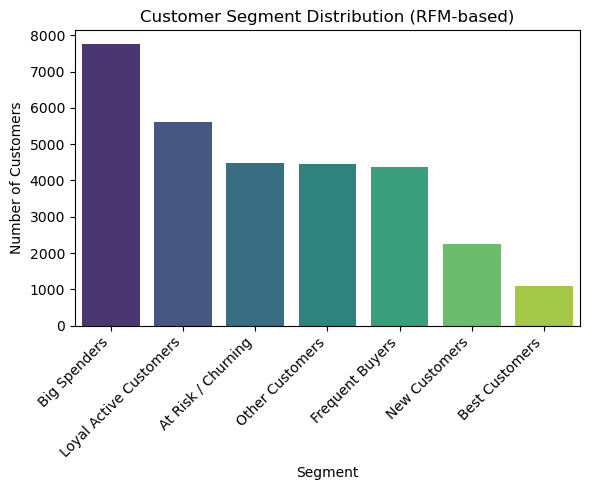

Segment
Big Spenders              7750
Loyal Active Customers    5618
At Risk / Churning        4469
Other Customers           4455
Frequent Buyers           4382
New Customers             2235
Best Customers            1090
Name: count, dtype: int64


In [91]:
# Step 18: Visualize Customer Segment Distribution
segment_counts = rfm_df['Segment'].value_counts()

plt.figure(figsize=(6, 5))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")
plt.title('Customer Segment Distribution (RFM-based)')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(segment_counts)

In [77]:
# In [19]: Code Cell
# Step 19: Profile Customer Segments - Average RFM Values
segment_profile = rfm_df.groupby('Segment').agg(
    Avg_Recency=('Recency', 'mean'),
    Avg_Frequency=('Frequency', 'mean'),
    Avg_Monetary=('Monetary', 'mean'),
    Customer_Count=('Customer_ID', 'count')
).sort_values(by='Avg_Monetary', ascending=False)

print("--- Profile of RFM Customer Segments (Average RFM Values) ---")
print(segment_profile)

--- Profile of RFM Customer Segments (Average RFM Values) ---
                        Avg_Recency  Avg_Frequency  Avg_Monetary  \
Segment                                                            
Big Spenders             434.470194       1.000000  27888.836645   
Best Customers           120.100000       1.000000  27805.032110   
Loyal Active Customers   122.459416       1.000178  11267.046992   
Frequent Buyers          485.510041       1.000000   7357.375628   
Other Customers          366.709764       1.000000   7215.750617   
At Risk / Churning       610.548221       1.000000   7192.376594   
New Customers            122.207606       1.000000   7112.431320   

                        Customer_Count  
Segment                                 
Big Spenders                      7750  
Best Customers                    1090  
Loyal Active Customers            5618  
Frequent Buyers                   4382  
Other Customers                   4455  
At Risk / Churning                4469

C:\Users\chroh\AppData\Local\Temp\ipykernel_35812\2772812480.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_profile.sort_values('Avg_Monetary', ascending=False),


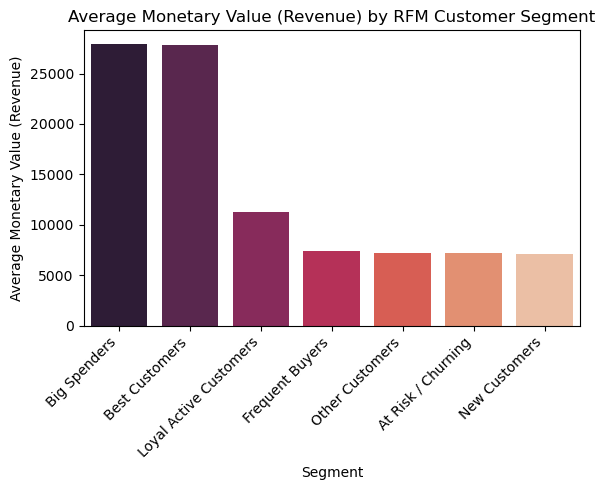

In [93]:
# In [20]: Code Cell
# Step 20: Visualize Average Monetary Value (Revenue) by RFM Segment
plt.figure(figsize=(6, 5))
sns.barplot(data=segment_profile.sort_values('Avg_Monetary', ascending=False),
            x=segment_profile.sort_values('Avg_Monetary', ascending=False).index,
            y='Avg_Monetary',
            palette="rocket")
plt.title('Average Monetary Value (Revenue) by RFM Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Average Monetary Value (Revenue)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\chroh\AppData\Local\Temp\ipykernel_35812\1832870884.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_profile.sort_values('Avg_Frequency', ascending=False),


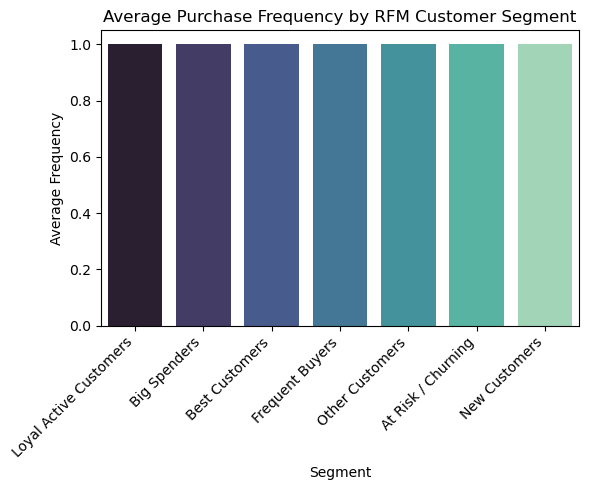

In [95]:
# In [21]: Code Cell
# Step 21: Visualize Average Frequency by RFM Segment
plt.figure(figsize=(6, 5))
sns.barplot(data=segment_profile.sort_values('Avg_Frequency', ascending=False),
            x=segment_profile.sort_values('Avg_Frequency', ascending=False).index,
            y='Avg_Frequency',
            palette="mako")
plt.title('Average Purchase Frequency by RFM Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Average Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()